In [1]:
# Multiple Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load and EDA
print("TASK 1: EDA & PREPROCESSING")
file_path = '/content/sample_data/ToyotaCorolla - MLR.csv'
df = pd.read_csv(file_path)

TASK 1: EDA & PREPROCESSING


In [3]:
print(f"Dataset shape: {df.shape}")
print("\nSummary Statistics:")
print(df.describe())

Dataset shape: (1436, 11)

Summary Statistics:
              Price    Age_08_04             KM           HP    Automatic  \
count   1436.000000  1436.000000    1436.000000  1436.000000  1436.000000   
mean   10730.824513    55.947075   68533.259749   101.502089     0.055710   
std     3626.964585    18.599988   37506.448872    14.981080     0.229441   
min     4350.000000     1.000000       1.000000    69.000000     0.000000   
25%     8450.000000    44.000000   43000.000000    90.000000     0.000000   
50%     9900.000000    61.000000   63389.500000   110.000000     0.000000   
75%    11950.000000    70.000000   87020.750000   110.000000     0.000000   
max    32500.000000    80.000000  243000.000000   192.000000     1.000000   

                cc        Doors  Cylinders        Gears      Weight  
count   1436.00000  1436.000000     1436.0  1436.000000  1436.00000  
mean    1576.85585     4.033426        4.0     5.026462  1072.45961  
std      424.38677     0.952677        0.0     0.

In [4]:
df.columns = ['Price', 'Age_0804', 'KM', 'FuelType', 'HP', 'Automatic',
              'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

In [5]:
df['Age'] = df['Age_0804'].astype(str).str.replace('_0804', '').astype(int)
df.drop('Age_0804', axis=1, inplace=True)

In [6]:
df['FuelType'] = df['FuelType'].map({'Petrol': 0, 'Diesel': 1, 'CNG': 2}).fillna(0)
df['Automatic'] = df['Automatic'].map({'Yes': 1, 'No': 0}).fillna(0)

In [7]:
numeric_cols = ['Price', 'Age', 'KM', 'HP', 'cc', 'Weight']
print("\nCorrelation with Price:")
print(df[numeric_cols].corr()['Price'].sort_values(ascending=False))


Correlation with Price:
Price     1.000000
Weight    0.581198
HP        0.314990
cc        0.126389
KM       -0.569960
Age      -0.876590
Name: Price, dtype: float64


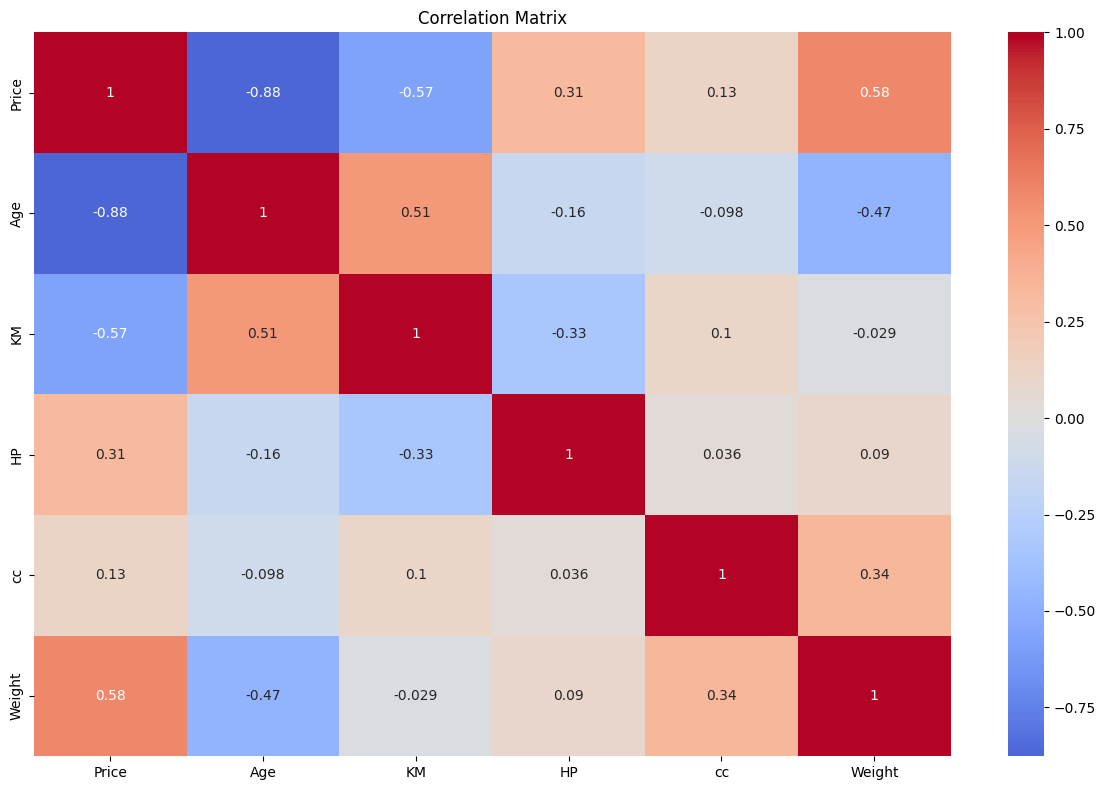

In [8]:
#Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
#Train-Test Split
print("\nTASK 2: TRAIN-TEST SPLIT")
features = ['Age', 'KM', 'FuelType', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']
X = df[features]
y = df['Price']


TASK 2: TRAIN-TEST SPLIT


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
print(f"Train: {X_train.shape}, Test: {X_test.shape}")

Train: (1148, 10), Test: (288, 10)


In [12]:
#3 Different Models
print("\nTASK 3: 3 MODELS")


TASK 3: 3 MODELS


In [13]:
#All features
model1 = LinearRegression()
model1.fit(X_train_scaled, y_train)
y_pred1 = model1.predict(X_test_scaled)
print("\nModel 1 Coefficients:")
for i, feat in enumerate(features):
    print(f"{feat}: {model1.coef_[i]:.2f}")


Model 1 Coefficients:
Age: -2268.01
KM: -644.72
FuelType: -347.13
HP: 303.32
Automatic: -0.00
cc: -29.67
Doors: -39.56
Cylinders: 0.00
Gears: 97.67
Weight: 1210.62


In [14]:
#Top 4 features
key_features = ['Age', 'KM', 'HP', 'Weight']
X2 = df[key_features]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
scaler2 = StandardScaler()
X2_train_scaled = scaler2.fit_transform(X2_train)
X2_test_scaled = scaler2.transform(X2_test)
model2 = LinearRegression()
model2.fit(X2_train_scaled, y2_train)
y_pred2 = model2.predict(X2_test_scaled)

In [15]:
#Features + Interaction
X3 = df[key_features].copy()
X3['Age_KM'] = X3['Age'] * X3['KM']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
scaler3 = StandardScaler()
X3_train_scaled = scaler3.fit_transform(X3_train)
X3_test_scaled = scaler3.transform(X3_test)
model3 = LinearRegression()
model3.fit(X3_train_scaled, y3_train)
y_pred3 = model3.predict(X3_test_scaled)

In [16]:
#Evaluation
print("\nTASK 4: EVALUATION")
def evaluate_model(y_true, y_pred, name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name}: RMSE={rmse:.0f}, R²={r2:.4f}")


TASK 4: EVALUATION


In [17]:
evaluate_model(y_test, y_pred1, "Model 1 (All Features)")
evaluate_model(y2_test, y_pred2, "Model 2 (4 Features)")
evaluate_model(y3_test, y_pred3, "Model 3 (Interaction)")

Model 1 (All Features): RMSE=1452, R²=0.8420
Model 2 (4 Features): RMSE=1412, R²=0.8506
Model 3 (Interaction): RMSE=1311, R²=0.8712


In [18]:
#Lasso & Ridge
print("\nTASK 5: LASSO & RIDGE")
lasso = Lasso(alpha=10.0, random_state=42, max_iter=2000)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)
print(f"Lasso non-zero features: {np.sum(lasso.coef_ != 0)}/10")


TASK 5: LASSO & RIDGE
Lasso non-zero features: 8/10


In [19]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

In [20]:
evaluate_model(y_test, y_pred_lasso, "Lasso")
evaluate_model(y_test, y_pred_ridge, "Ridge")

Lasso: RMSE=1447, R²=0.8431
Ridge: RMSE=1450, R²=0.8425


In [21]:
#Final Results Table
results = pd.DataFrame({
    'Model': ['Linear(All)', 'Linear(4feat)', 'Linear(Interact)', 'Lasso', 'Ridge'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred1)),
             np.sqrt(mean_squared_error(y2_test, y_pred2)),
             np.sqrt(mean_squared_error(y3_test, y_pred3)),
             np.sqrt(mean_squared_error(y_test, y_pred_lasso)),
             np.sqrt(mean_squared_error(y_test, y_pred_ridge))],
    'R²': [r2_score(y_test, y_pred1), r2_score(y2_test, y_pred2),
           r2_score(y3_test, y_pred3), r2_score(y_test, y_pred_lasso),
           r2_score(y_test, y_pred_ridge)]
})

In [22]:
print("\nFINAL RESULTS TABLE:")
print(results.round(4))


FINAL RESULTS TABLE:
              Model       RMSE      R²
0       Linear(All)  1451.9347  0.8420
1     Linear(4feat)  1411.8502  0.8506
2  Linear(Interact)  1311.0969  0.8712
3             Lasso  1447.0736  0.8431
4             Ridge  1449.6631  0.8425


In [23]:
print("\nINTERVIEW QUESTIONS:")
print("1. Normalization: Scales features to same range (helps regularization)")
print("2. Multicollinearity: VIF, feature selection, Ridge/Lasso, PCA")


INTERVIEW QUESTIONS:
1. Normalization: Scales features to same range (helps regularization)
2. Multicollinearity: VIF, feature selection, Ridge/Lasso, PCA


In [26]:
print("\n ALL 5 TASKS COMPLETED")


 ALL 5 TASKS COMPLETED
